<h1 style="color:#4CAF50; text-align:center;">Music-to-Image Generation Project</h1>

<h2 style="color:#2196F3;">Project Overview</h2>
<p style="font-size:16px;">En tant que passionné de musique électronique, particulièrement inspiré par la techno, le dub, le punk, le reggae, mais aussi le jazz, le blues, le funk, l'expérimentale et j'en passe... Ce projet est une fusion de mes deux univers : la science des données et la création artistique. En utilisant mes connaissances en machine learning et traitement du son, je vise à explorer comment les caractéristiques musicales peuvent être traduites en visuels abstraits et immersifs. L'idée est de capturer la complexité des sons pour générer des images en temps réel, un concept qui résonne avec ma recherche artistique autour d'un projet complet en cours de construction.</p>

<h2 style="color:#2196F3;">First Test: Audio Feature Extraction</h2>
<p style="font-size:16px;">In this first step, we will use a sample audio file to extract its waveform and Mel spectrogram. These features will help us understand the structure and components of the music, and visualize the frequency content over time.</p>

<h3 style="color:#FF5722;">Steps to Perform:</h3>
<ol style="font-size:16px;">
  <li>Load the audio file using the <code>librosa</code> library.</li>
  <li>Display the waveform (amplitude vs. time).</li>
  <li>Compute the Mel spectrogram to visualize the frequency content.</li>
  <li>Display the Mel spectrogram.</li>
</ol>

<h3 style="color:#FF5722;">Code for Audio Processing</h3>
<p style="font-size:16px;">Here’s the Python code to load the audio file, plot its waveform, and generate the Mel spectrogram:</p>

<pre style="background-color:#666666; padding:10px;">
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_path = 'data/sample_audio.wav'
y, sr = librosa.load(audio_path)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of the Audio File")
plt.show()

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.show()
</pre>

<h3 style="color:#FF5722;">Audio File</h3>
<p style="font-size:16px;">The audio file used in this example is stored in the <code>data</code> directory of the project. 

<h3 style="color:#FF5722;">Expected Output</h3>
<ul style="font-size:16px;">
  <li>A plot of the audio waveform, showing the amplitude variation over time.</li>
  <li>A Mel spectrogram plot, showing the intensity of different frequency bands over time.</li>
</ul>

<h2 style="color:#2196F3;">Next Steps</h2>
<p style="font-size:16px;">Once we've successfully extracted and visualized the features, we will proceed to train a machine learning model that generates images based on these audio features. Stay tuned for the next steps!</p>

<p style="text-align:center; font-size:14px; color:#888;">© 2024 Music-to-Image Generation Project</p>


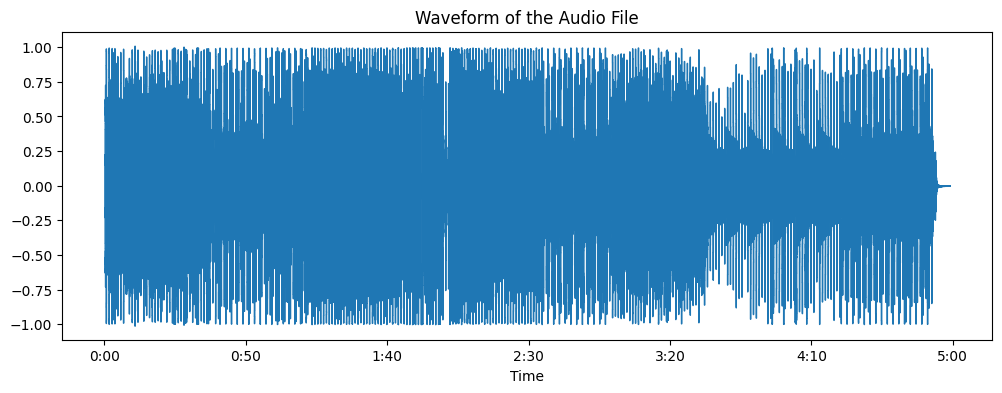

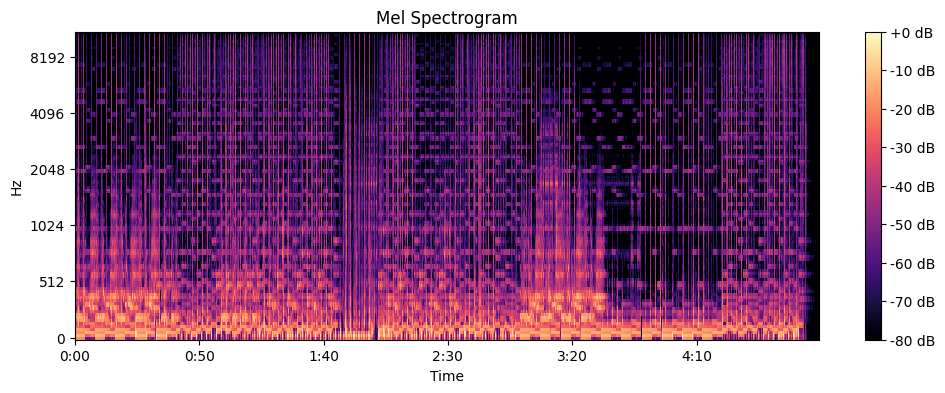

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np 

# Load the audio file
audio_path = '../data/track1_test.wav'
y, sr = librosa.load(audio_path)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of the Audio File")
plt.show()

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.show()


## 1. Exploration des Caractéristiques Audio Avancées

##### MFCC (Mel-Frequency Cepstral Coefficients) : Utilisé pour capturer la texture sonore et couramment utilisé dans la reconnaissance vocale et la classification musicale.

<h2 style="color:#2196F3;">MFCC (Mel-Frequency Cepstral Coefficients)</h2>
<p style="font-size:16px;">Les MFCC sont des coefficients utilisés pour représenter l'enveloppe spectrale du signal audio en fonction des fréquences perceptuelles, ce qui les rend utiles pour analyser la texture sonore. Dans ce graphique, l'axe vertical représente les coefficients Mel (MFCCs), tandis que l'axe horizontal montre le temps. Les variations des couleurs indiquent l'intensité de ces coefficients, avec des valeurs plus élevées en rouge et des valeurs plus faibles en bleu. On peut observer une répartition des coefficients qui change au fil du temps, reflétant les différentes sections du morceau.</p>
<p style="font-size:16px;">Cette visualisation est particulièrement utile pour capturer les variations timbrales et dynamiques de l'audio, et elle permet de repérer les moments où la texture du son change de manière significative. Par exemple, les transitions visibles dans les MFCCs pourraient correspondre à des passages où le rythme ou l'harmonie évolue.</p>


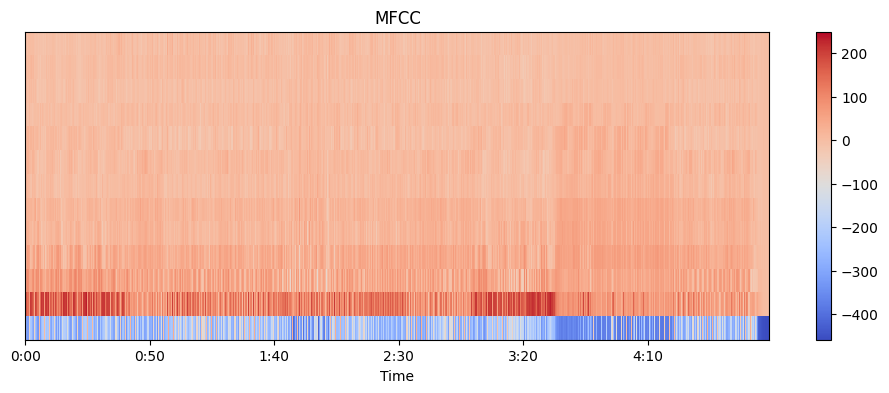

In [10]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

#### Chroma Features : Capture les éléments harmoniques du signal, utiles pour détecter les accords et les harmonies.

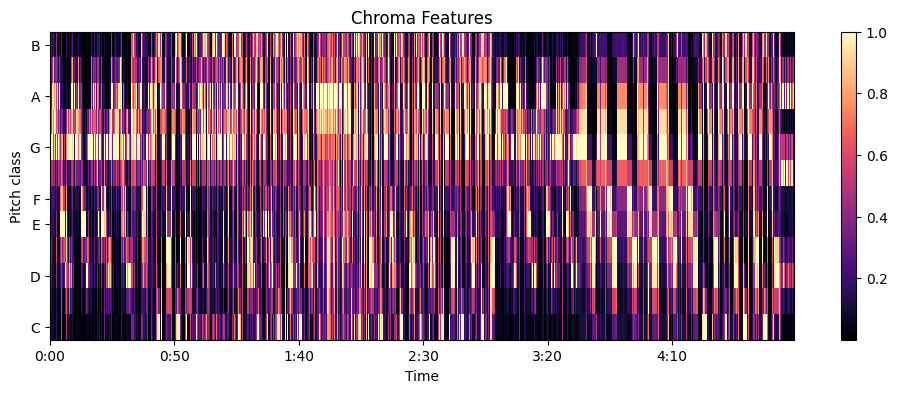

In [11]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Features')
plt.show()


<h2 style="color:#2196F3;">Chroma Features</h2>
<p style="font-size:16px;">Les caractéristiques chroma représentent la distribution de l'énergie musicale parmi les 12 classes de hauteurs (C, C#, D, etc.), ce qui correspond directement aux notes musicales. Dans ce graphique, l'axe vertical montre les classes de hauteur, et l'axe horizontal représente le temps. Les couleurs indiquent l'intensité d'une note donnée dans chaque fenêtre temporelle, avec des valeurs plus élevées en jaune et des valeurs plus faibles en violet.</p>
<p style="font-size:16px;">On peut observer ici les moments où certaines hauteurs sont particulièrement présentes, ce qui reflète les changements d'accords ou les sections où une note dominante est jouée. Ce type d'analyse est très utile pour détecter les structures harmoniques dans un morceau et comprendre les progressions d'accords ou les modulations. Par exemple, les bandes plus marquées de couleur montrent les instants où certaines notes sont particulièrement accentuées.</p>


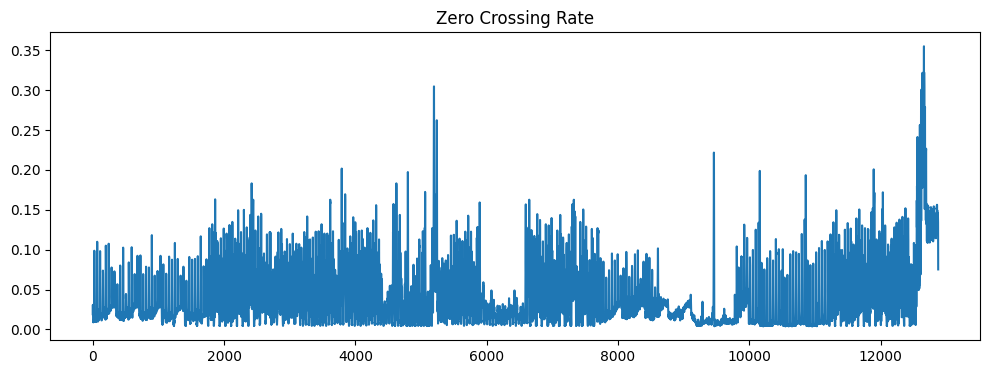

In [12]:
# Calculer le taux de passage par zéro
zcr = librosa.feature.zero_crossing_rate(y)

# Afficher le ZCR
plt.figure(figsize=(12, 4))
plt.plot(zcr[0])
plt.title("Zero Crossing Rate")
plt.show()


<h2 style="color:#2196F3;">Zero Crossing Rate (ZCR)</h2>
<p style="font-size:16px;">Le Zero Crossing Rate (ZCR) mesure la fréquence à laquelle le signal audio croise l'axe zéro, c'est-à-dire le nombre de fois où le signal change de signe (de positif à négatif ou vice versa) par intervalle de temps. Il s'agit d'une caractéristique couramment utilisée pour détecter les sons percussifs ou les sections bruyantes d'un morceau.</p>
<p style="font-size:16px;">Dans le graphique ci-dessus, l'axe vertical représente le taux de passage par zéro (ZCR), et l'axe horizontal correspond au temps. Des valeurs plus élevées de ZCR indiquent des moments où il y a une forte activité dans les hautes fréquences, typiquement associées à des sons percussifs, du bruit ou des transitions rapides. Les sections où le ZCR est plus faible correspondent généralement à des parties plus douces ou harmonieuses du morceau, avec moins de changements abrupts de la forme d'onde.</p>
<p style="font-size:16px;">L'analyse du ZCR permet d'identifier les moments où le morceau présente des éléments percussifs ou rythmiques dominants, ainsi que des passages avec des textures plus complexes ou des transitions sonores rapides.</p>


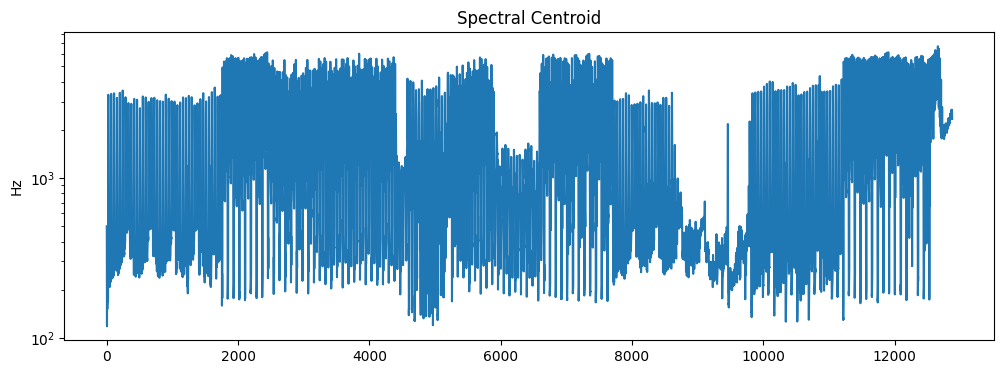

In [13]:
# Calculer le Spectral Centroid
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# Afficher le Spectral Centroid
plt.figure(figsize=(12, 4))
plt.semilogy(centroid.T, label='Spectral Centroid')
plt.ylabel('Hz')
plt.title("Spectral Centroid")
plt.show()


<h2 style="color:#2196F3;">Spectral Centroid</h2>
<p style="font-size:16px;">Le Spectral Centroid (ou centroïde spectral) représente le "centre de gravité" du spectre audio. Il est calculé comme la moyenne pondérée des fréquences présentes dans le signal, avec l'amplitude de chaque fréquence comme poids. En d'autres termes, il s'agit d'une mesure de la luminosité du son : plus le centroid est élevé, plus le son contient de hautes fréquences.</p>
<p style="font-size:16px;">Dans le graphique ci-dessus, l'axe vertical représente la fréquence du centroid en Hertz (Hz), et l'axe horizontal correspond au temps. Des valeurs élevées de Spectral Centroid indiquent des sections où le son est plus "brillant", avec une dominance des fréquences aiguës, tandis que des valeurs plus basses indiquent des sections plus "sombres" ou avec une prédominance des basses fréquences.</p>
<p style="font-size:16px;">L'analyse du Spectral Centroid permet d'identifier les variations dans la texture du son au fil du temps. Par exemple, des changements abrupts dans le centroid peuvent refléter des transitions entre des sections avec des percussions intenses et des passages plus mélodiques ou harmonieux.</p>


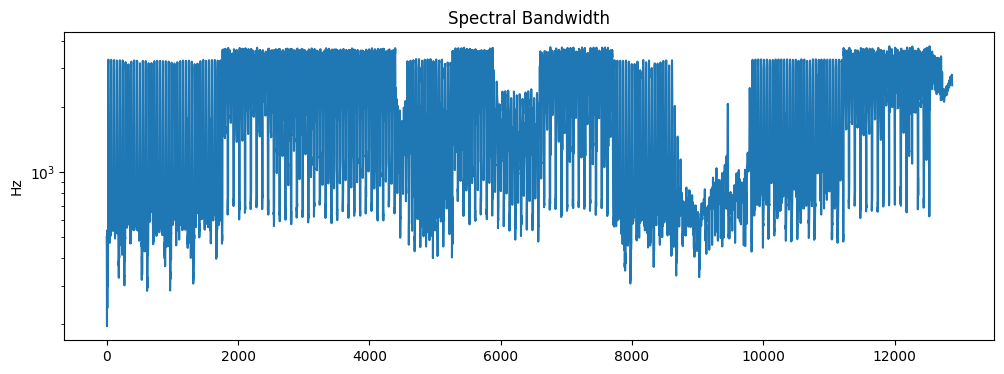

In [14]:
# Calculer la largeur spectrale (Spectral Bandwidth)
bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

# Afficher la largeur spectrale
plt.figure(figsize=(12, 4))
plt.semilogy(bandwidth.T, label='Spectral Bandwidth')
plt.ylabel('Hz')
plt.title("Spectral Bandwidth")
plt.show()


<h2 style="color:#2196F3;">Spectral Bandwidth</h2>
<p style="font-size:16px;">La Spectral Bandwidth (ou largeur spectrale) mesure la gamme de fréquences autour du centroïde spectral. C'est une indication de la "dispersion" des fréquences dans le signal audio. Une largeur spectrale élevée signifie que les fréquences sont plus dispersées, tandis qu'une largeur spectrale plus faible indique que les fréquences sont plus concentrées autour du centroid.</p>
<p style="font-size:16px;">Dans le graphique ci-dessus, l'axe vertical montre la largeur spectrale en Hertz (Hz) et l'axe horizontal correspond au temps. Les sections avec une largeur spectrale élevée correspondent généralement à des sons riches en harmoniques ou des passages plus complexes, tandis que les sections avec une largeur spectrale faible sont souvent plus douces, avec moins de variations dans les fréquences.</p>
<p style="font-size:16px;">L'analyse de la Spectral Bandwidth est utile pour identifier les changements dans la richesse harmonique ou la complexité sonore d'un morceau. Elle permet de repérer les moments où le son devient plus dense en fréquences ou, à l'inverse, plus simplifié.</p>


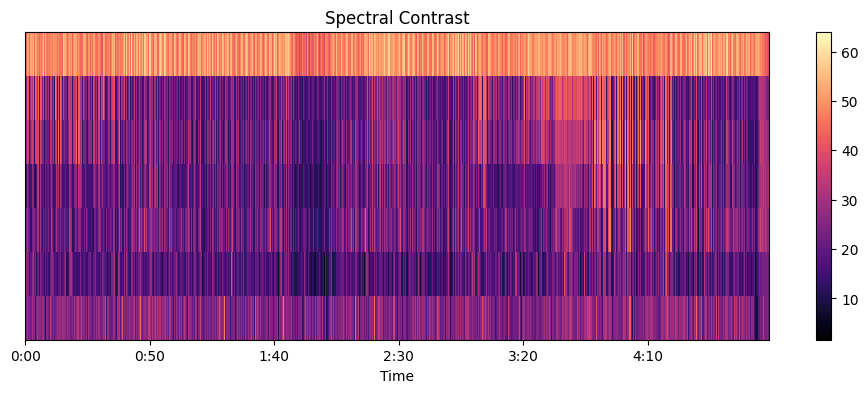

In [15]:
# Calculer le contraste spectral
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Afficher le contraste spectral
plt.figure(figsize=(12, 4))
librosa.display.specshow(contrast, x_axis='time', sr=sr)
plt.colorbar()
plt.title('Spectral Contrast')
plt.show()


<h2 style="color:#2196F3;">Spectral Contrast</h2>
<p style="font-size:16px;">Le Spectral Contrast mesure la différence entre les pics et les vallées (creux) dans le spectre de fréquences. En d'autres termes, il permet de capturer la dynamique des fréquences dans différentes bandes. Une grande différence entre les valeurs des pics et des creux indique une forte dynamique, tandis qu'une faible différence suggère un spectre plus uniforme.</p>
<p style="font-size:16px;">Dans le graphique ci-dessus, chaque bande représente une gamme de fréquences, et l'axe horizontal représente le temps. Les couleurs indiquent la valeur du contraste spectral, avec des couleurs plus chaudes (comme l'orange) représentant des contrastes plus élevés. Cela peut être utilisé pour identifier des sections où le spectre présente une plus grande variabilité dans les amplitudes des fréquences.</p>
<p style="font-size:16px;">L'analyse du Spectral Contrast est particulièrement utile pour capturer les propriétés harmoniques et les transitions entre des parties complexes ou riches en fréquences et des passages plus homogènes ou stables. Cela peut être utilisé pour repérer des sections telles que des transitions entre des couplets calmes et des refrains dynamiques dans un morceau musical.</p>


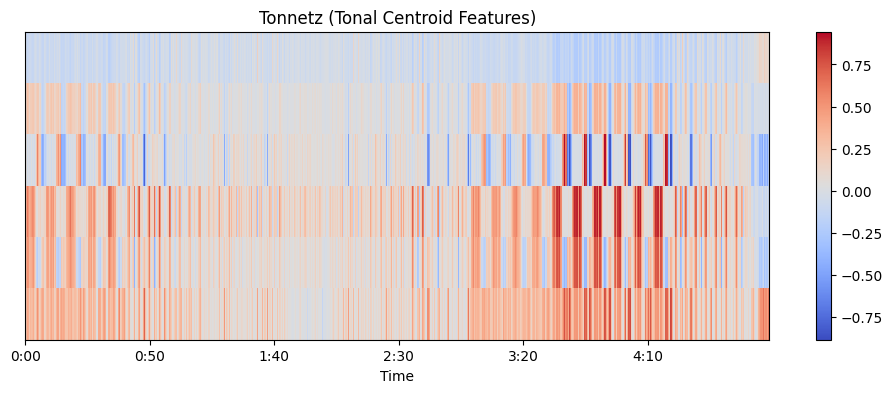

In [16]:
# Calculer les caractéristiques Tonnetz
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

# Afficher les caractéristiques Tonnetz
plt.figure(figsize=(12, 4))
librosa.display.specshow(tonnetz, x_axis='time')
plt.colorbar()
plt.title('Tonnetz (Tonal Centroid Features)')
plt.show()


<h2 style="color:#2196F3;">Tonnetz (Tonal Centroid Features)</h2>
<p style="font-size:16px;">Les caractéristiques Tonnetz (Tonal Centroid Features) sont utilisées pour capturer la structure tonale de la musique, en particulier les relations harmoniques telles que les intervalles de quintes, les accords majeurs et mineurs, ainsi que les modulations entre les tonalités. Ces caractéristiques sont calculées à partir des coefficients de transformée de Fourier de la musique.</p>
<p style="font-size:16px;">Dans le graphique ci-dessus, l'axe vertical représente différentes dimensions des caractéristiques Tonnetz (intervalles de quintes, accords majeurs/mineurs), et l'axe horizontal montre l'évolution de ces relations harmoniques au fil du temps. Les couleurs plus chaudes (orange, rouge) indiquent des valeurs positives ou des changements harmoniques vers des accords ou tonalités plus proches, tandis que les couleurs plus froides (bleu) montrent des valeurs négatives ou des modulations plus éloignées dans l'espace tonal.</p>
<p style="font-size:16px;">L'analyse du Tonnetz permet de comprendre comment les relations tonales évoluent dans un morceau, aidant ainsi à identifier les progressions d'accords et les changements harmoniques. Cela est particulièrement utile pour les morceaux de musique avec des structures harmoniques complexes ou de nombreuses modulations tonales.</p>


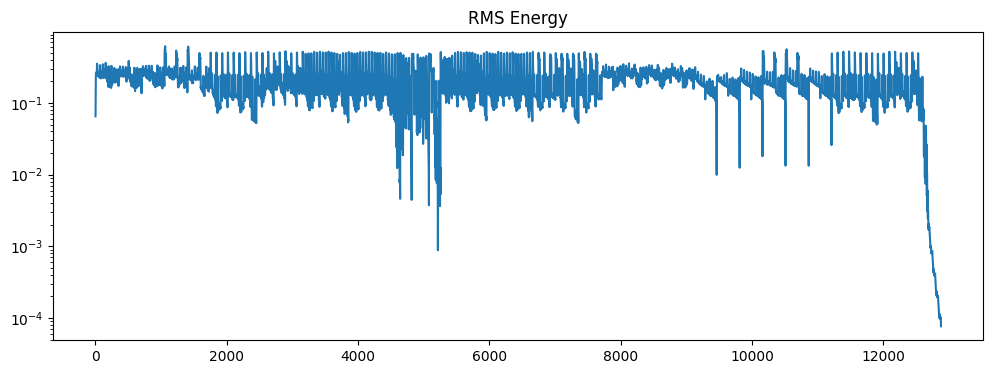

In [17]:
# Calculer l'énergie RMS
rms = librosa.feature.rms(y=y)

# Afficher l'énergie RMS
plt.figure(figsize=(12, 4))
plt.semilogy(rms.T, label='RMS Energy')
plt.title('RMS Energy')
plt.show()


<h2 style="color:#2196F3;">RMS Energy (Root Mean Square Energy)</h2>
<p style="font-size:16px;">L'énergie RMS (Root Mean Square Energy) est une mesure de l'intensité sonore ou de la puissance d'un signal audio. Elle capture la valeur quadratique moyenne du signal, ce qui permet d'évaluer l'amplitude moyenne au fil du temps. L'énergie RMS est particulièrement utile pour identifier les sections d'un morceau où l'intensité varie de manière significative, comme lors de transitions entre des passages doux et forts.</p>
<p style="font-size:16px;">Dans le graphique ci-dessus, l'axe vertical montre l'énergie RMS en échelle logarithmique, et l'axe horizontal représente le temps. Des pics dans l'énergie RMS indiquent des moments où l'amplitude du son est élevée, typiquement associés à des sons forts ou intenses, tandis que les creux correspondent à des moments plus calmes ou silencieux.</p>
<p style="font-size:16px;">L'analyse de l'énergie RMS permet de visualiser la dynamique globale du morceau, ainsi que les variations de puissance au fil du temps. Elle est souvent utilisée pour segmenter un signal en fonction de son intensité, afin de distinguer les passages forts des passages doux.</p>


<h2 style="color:#2196F3;">Conclusion</h2>
<p style="font-size:16px;">Dans ce notebook, nous avons exploré différentes caractéristiques acoustiques d'un morceau que j'ai entièrement composé, en utilisant des outils d'analyse audio. Chaque caractéristique a permis de capturer des aspects uniques du son, comme la dynamique (RMS Energy), la structure harmonique (Tonnetz), la richesse spectrale (Spectral Bandwidth), ainsi que des informations sur la texture et la luminosité sonore (Spectral Centroid et MFCCs).</p>

<p style="font-size:16px;">Ces analyses m'ont permis de mieux comprendre les variations dans l'intensité sonore et les transitions harmoniques tout au long du morceau. Par exemple, l'exploration du <strong>Spectral Contrast</strong> a révélé des moments de grande complexité harmonique, tandis que le <strong>Zero Crossing Rate</strong> a mis en évidence des sections percussives particulièrement dynamiques.</p>

<p style="font-size:16px;">Cette première exploration offre une vue détaillée des aspects structurels et acoustiques de ma composition. Ces informations pourront être utilisées comme base pour des traitements plus avancés, comme la génération d'images à partir de la musique ou encore l'entraînement de modèles de machine learning pour capturer la relation entre les éléments musicaux et des représentations visuelles abstraites.</p>

<p style="font-size:16px;">Ce notebook constitue une base solide pour des expérimentations futures, qu'il s'agisse d'analyser d'autres compositions ou de créer des visuels inspirés des caractéristiques acoustiques d'un morceau. Cette approche peut également servir à affiner mes choix de production musicale, en m'aidant à mieux saisir comment mes sons sont perçus et analysés sur le plan acoustique.</p>

<p style="text-align:center; font-size:14px; color:#888;">© 2024, Matthew R.</p>
